In [ ]:
'''
Area plot is based on line plots
it is used to represent cumulated totals using numbers or percentages over time
matplotlib plots the indices of a df on the horizontal axis, in this case it means that 
countries will be plotted in the x axis, to fix this we need to transpsoe the data frame
this way the years become the indices
Area plots are stacked by default


histograms represent the frequency of distribution of a variable
the vertical axis is the frequency or number of datapoints in each bin
ideally the countries become the indices and are plotted in the x axis, for this we transpose the 
df

bar charts the length of each bar is proportional to the bar it represents
it compares values of variables for a particular time span
to plot a horizontal bar chart we use bahr example question.plt(kind='barh')

'''

In [2]:
from __future__ import print_function # this line adds compatibility to python 2
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# install xlrd
!pip install xlrd

print('xlrd installed!')

df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheetname='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

# print the dimensions of the dataframe
print(df_can.shape)

xlrd installed!
Data downloaded and read into a dataframe!
(195, 43)


In [3]:
#Clean up the data set to remove columns that are not informative to us for visualization (eg. Type, AREA, REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

OdName AreaName          RegName             DevName  1980  1981  \
0     Afghanistan     Asia    Southern Asia  Developing regions    16    39   
1         Albania   Europe  Southern Europe   Developed regions     1     0   
2         Algeria   Africa  Northern Africa  Developing regions    80    67   
3  American Samoa  Oceania        Polynesia  Developing regions     0     1   
4         Andorra   Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...   2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...   2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...   1450  1223   856   702   560   716   561   
2    71    69    63    44  ...   3616  3626  4807  3623  4005  5393  4752   
3     0     0     0     0  ...      0     0     1     0     0     0     0   
4     0     0     0     0  ...      0     0     1     1     0     0     0   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  
3     0     0     0  
4     0     1     1  

[5 rows x 38 columns]

In [4]:
#rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...   2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...   2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...   1450  1223   856   702   560   716   561   
2    71    69    63    44  ...   3616  3626  4807  3623  4005  5393  4752   
3     0     0     0     0  ...      0     0     1     0     0     0     0   
4     0     0     0     0  ...      0     0     1     1     0     0     0   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  
3     0     0     0  
4     0     1     1  

[5 rows x 38 columns]

In [5]:
#column labels of type string
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

#Notice how the above line of code returned False when we tested if all the column labels are of type string. So let's change them all to string type.
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

#Set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...   2004  2005  2006  2007  \
Country                                       ...                            
Afghanistan       39    47    71   340   496  ...   2978  3436  3009  2652   
Albania            0     0     0     0     1  ...   1450  1223   856   702   
Algeria           71    69    63    44    69  ...   3616  3626  4807  3623   
American Samoa     0     0     0     0     0  ...      0     0     1     0   
Andorra            0     0     0     0     2  ...      0     0     1     1   

                2008  2009  2010  2011  2012  2013  
Country                                             
Afghanistan     2111  1746  1758  2203  2635  2004  
Albania          560   716   561   539   620   603  
Algeria         4005  5393  4752  4325  3774  4331  
American Samoa     0     0     0     0     0     0  
Andorra            0     0     0     0     1     1  

[5 rows x 37 columns]

In [6]:
#add column for totals
df_can['Total'] = df_can.sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_can.head()
print ('data dimensions:', df_can.shape)



data dimensions: (195, 38)


In [7]:
# finally, let's create a list of years from 1980 - 2014
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [8]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__ ) # >= 2.0.0

type(df_can['2013'])

Matplotlib version:  3.0.2


pandas.core.series.Series

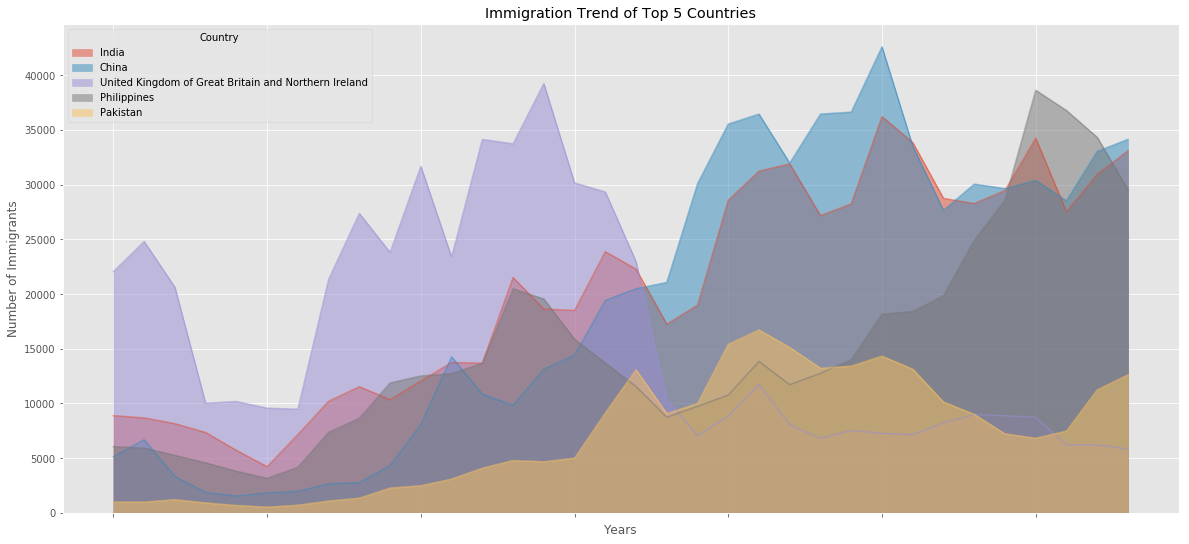

In [9]:
#Stacked Line Plot or Area plot
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

#to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass stacked=False
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 9), # pass a tuple (x, y) size
            ) 

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

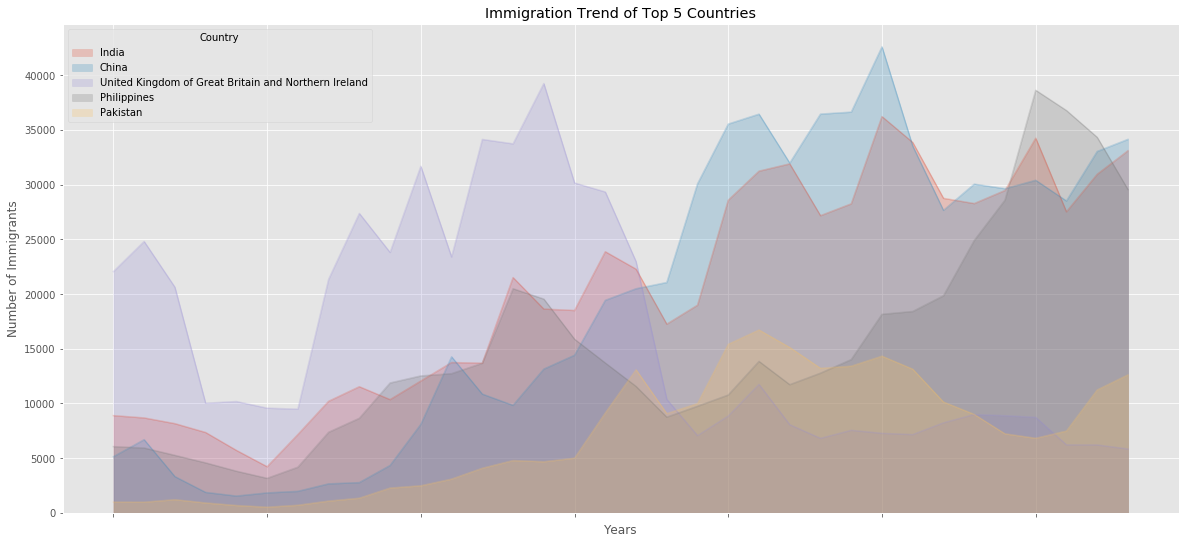

In [10]:
#modify transparency
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 9),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

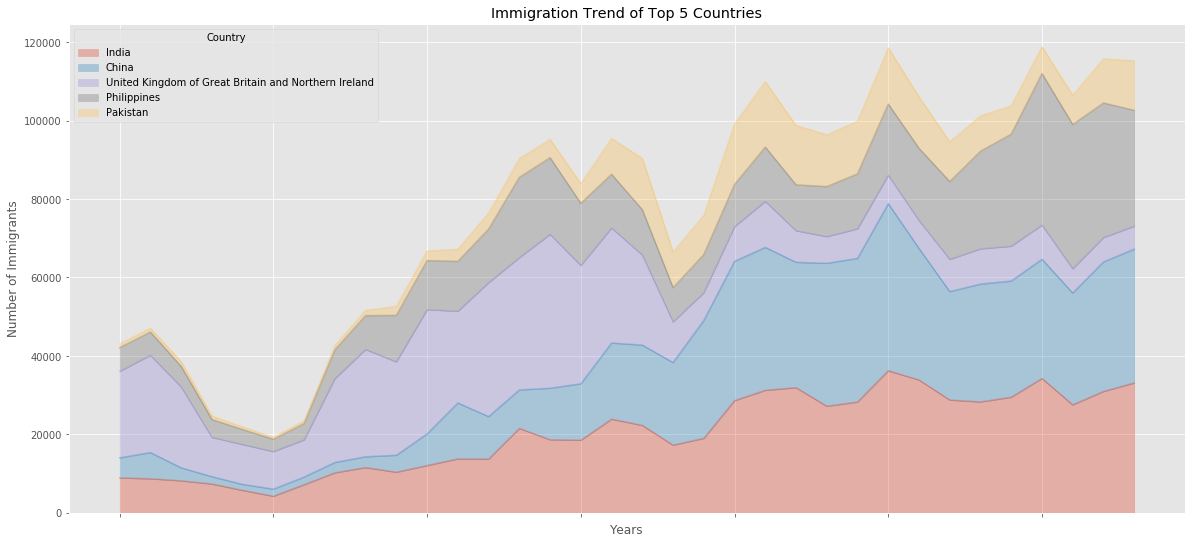

In [11]:
#scripting
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 9))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


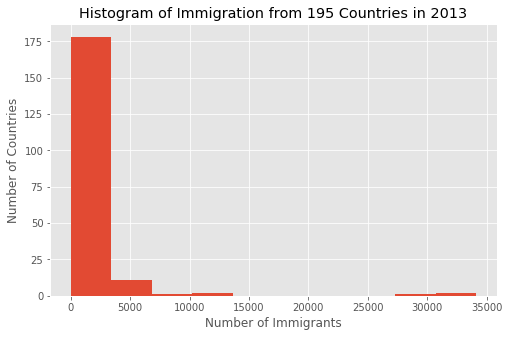

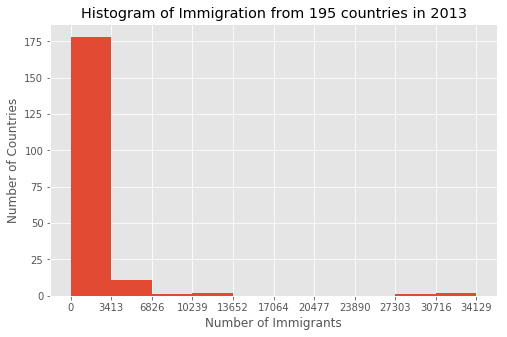

In [12]:
#A histogram is a way of representing the frequency distribution of numeric data set. 
#The way it works is it partitions the x-axis into bins, assigns each data point in 
#our dataset to a bin, and then counts the number of data points that have been assigned
#to each bin. So the y-axis is the frequency or the number of data points in each bin.
# Let's quickly view the 2013 data
df_can['2013'].head()

# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

#graph this distribution by passing kind=hist to plot()
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()


# x-axis represents the population range of immigrants in intervals of 3412.9. 
#The y-axis represents the number of countries that contributed to the aforementioned population
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

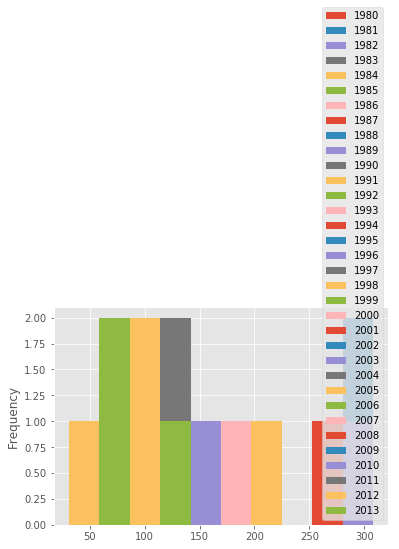

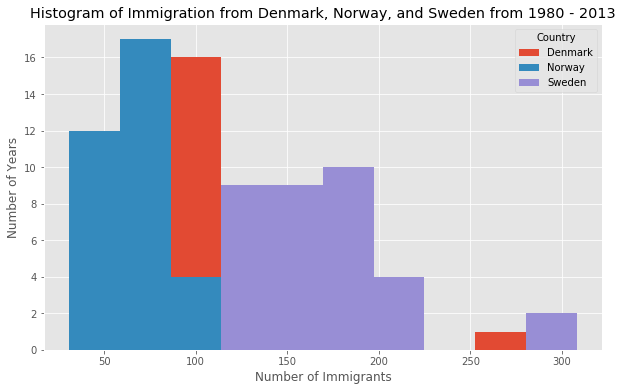

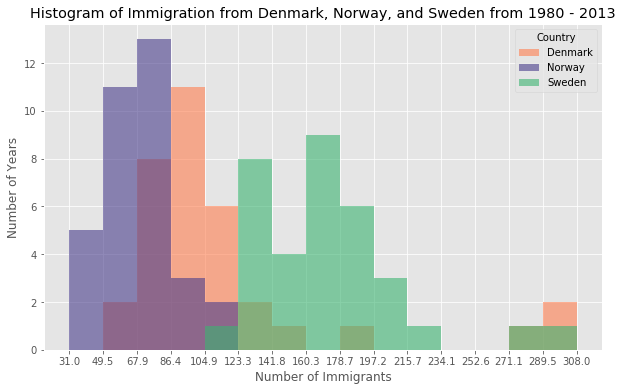

In [13]:
#What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?
# let's quickly view the data set 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# Un-stacked Histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

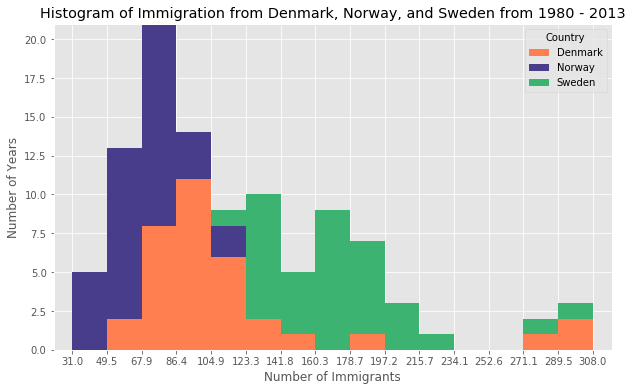

In [14]:
#If we do no want the plots to overlap each other, we can stack them using the stacked parameter. Let us also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim paramater,
#as show below
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

#Stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral','darkslateblue','mediumseagreen'],
          stacked=True,
          xlim=(xmin,xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

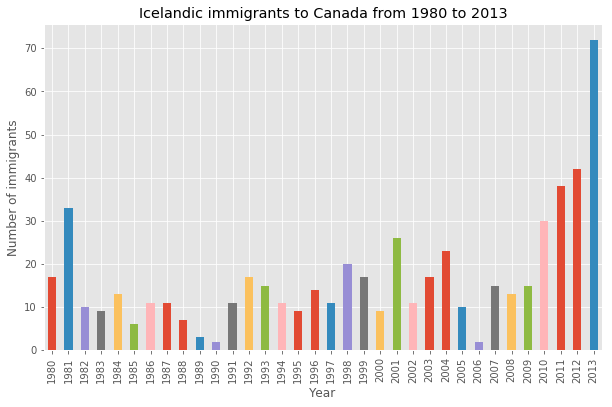

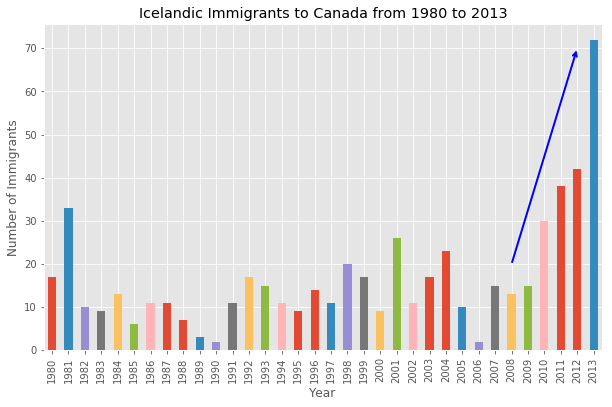

In [15]:
#compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

# step 2: plot data

df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # Place head of the arrow at point (year 2012 , pop 70 )
             xytext=(28, 20),         # Place base of the arrow at point (year 2008 , pop 20 )
             xycoords='data',         # Will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

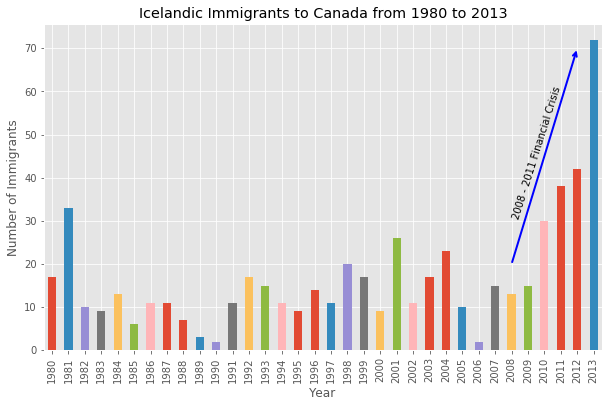

In [16]:
#annotate a text to go over the arrow
#rotation: rotation angle of text in degrees (counter clockwise)
#va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
#ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70 )
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20 )
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28,30),                   # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                # Based on trial and error to match the arrow
             va='bottom',                  # Want the text to be vertically 'bottom' aligned
             ha='left',                    # Want the text to be horizontally 'left' algned.
            )

plt.show()

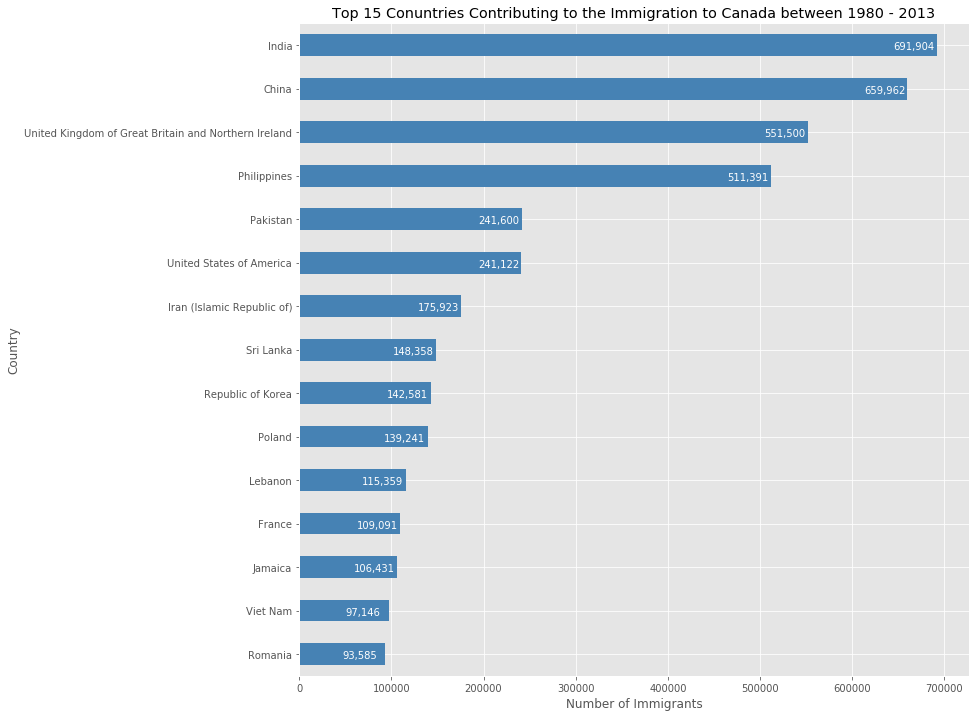

In [17]:
#Using the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. 
#Label each country with the total immigrant count.

# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()